In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#The dataset contains no header for columns, hence the header parameter
data1_abnor=pd.read_csv('./ptbdb_abnormal.csv',header=None)
data1_nor=pd.read_csv('./ptbdb_normal.csv',header=None)
data2_train=pd.read_csv('./mitbih_train.csv',header=None)
data2_test=pd.read_csv('./mitbih_test.csv',header=None)

In [3]:
data1 = pd.concat([data1_abnor, data1_nor]).sample(frac=1).reset_index(drop=True)
data2 = pd.concat([data2_train, data2_test]).sample(frac=1).reset_index(drop=True)

In [4]:
data2.loc[(data2[187] != 0),187]=1

In [5]:
data = pd.concat([data1,data2]).sample(frac=1).reset_index(drop=True)

In [6]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-2]]

In [7]:
random_seeed=42
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=random_seeed)
print(x_train.shape)

(92998, 186)


In [8]:
print(len(Y[Y[187] == 0 ]))
print(len(Y[Y[187] == 1 ]))

94635
29363


In [9]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,186,1])

In [10]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,186,1])

In [11]:
model=tf.keras.Sequential([
    layers.Conv1D(7, 7, activation='relu', input_shape=(186,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid') #softmax cuz categories
])

In [12]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=128,epochs=200,verbose=True,validation_split=0.2)

Epoch 1/200
582/582 [==============================] - 9s 14ms/step - loss: 0.3841 - accuracy: 0.8468 - val_loss: 0.3556 - val_accuracy: 0.8691
Epoch 2/200
582/582 [==============================] - 8s 14ms/step - loss: 0.2642 - accuracy: 0.8949 - val_loss: 0.2263 - val_accuracy: 0.9090
Epoch 3/200
582/582 [==============================] - 8s 14ms/step - loss: 0.2224 - accuracy: 0.9125 - val_loss: 0.2002 - val_accuracy: 0.9232
Epoch 4/200
582/582 [==============================] - 8s 13ms/step - loss: 0.1998 - accuracy: 0.9231 - val_loss: 0.1789 - val_accuracy: 0.9328
Epoch 5/200
582/582 [==============================] - 8s 14ms/step - loss: 0.1819 - accuracy: 0.9312 - val_loss: 0.1882 - val_accuracy: 0.9287
Epoch 6/200
582/582 [==============================] - 8s 14ms/step - loss: 0.1715 - accuracy: 0.9365 - val_loss: 0.1643 - val_accuracy: 0.9415
Epoch 7/200
582/582 [==============================] - 8s 13ms/step - loss: 0.1601 - accuracy: 0.9411 - val_loss: 0.1674 - val_accuracy:

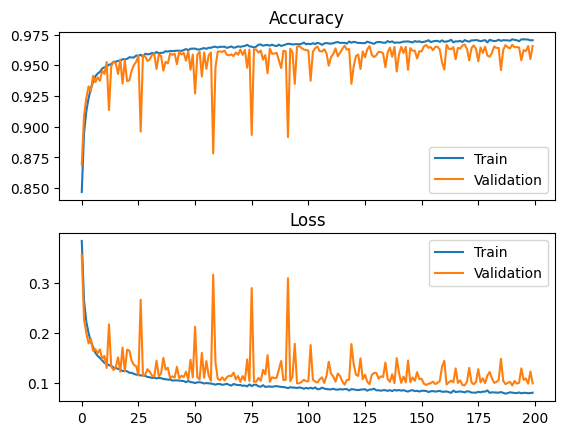

In [13]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [14]:
model.evaluate(x_test, y_test, verbose=True)

969/969 [==============================] - 2s 2ms/step - loss: 0.0916 - accuracy: 0.9679


[0.0915764793753624, 0.9679355025291443]

In [15]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

969/969 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     23710
         1.0       0.96      0.90      0.93      7290

    accuracy                           0.97     31000
   macro avg       0.96      0.95      0.95     31000
weighted avg       0.97      0.97      0.97     31000

